In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import math

## Выбираем вариант (n) и рисуем график уравнения

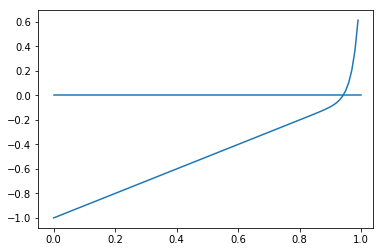

In [59]:
n = 7
x = np.arange(0, 1, 0.01)
y = x**(n+40) + x - 1
plt.plot(x, y)
ax = plt.gca()
l = mlines.Line2D([0,1], [0,0])
ax.add_line(l)
plt.show()

## Определяем функцию, ее производную и решаем с помощью метода Ньютона (метод касательных)

In [60]:
def f(x):
    return x**(n + 40) + x - 1
def derived_1_f(x):
    return (n+40) * x**(n+39) + 1
def Newton(xo, X, Y):
    e = 10**10
    eps = 10 ** (-8)
    i = 0
    while e > eps:
        x = xo - f(xo)/derived_1_f(xo)
        X = np.append(X, x)
        Y = np.append(Y, f(x))
        e = abs(x - xo)
        xo = x
        i += 1
        if i == 50:
            raise(Exception)
    return x, X, Y
try:
    X = np.array([])
    Y = np.array([])
    x, X, Y = Newton(1, X, Y)
    print('Answer: ' + str(x))
    print(X.size)
    print(Y.size)
except(Exception):
    print("This method does not feel for this equation")

Answer: 0.9414175462465465
7
7


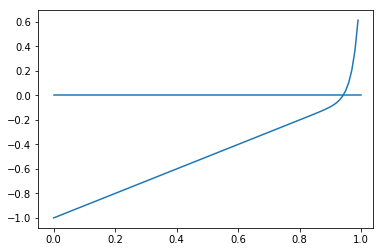

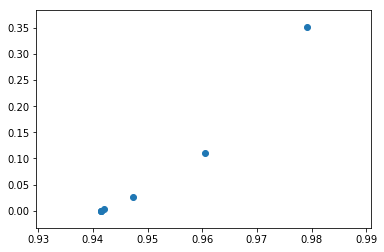

In [62]:
x = np.arange(0, 1, 0.01)
y = x**(n+40) + x - 1
plt.plot(x, y)
ax = plt.gca()
l = mlines.Line2D([0,1], [0,0])
ax.add_line(l)
plt.show()
plt.scatter(X, Y)
plt.show()

## Теперь метод простых итераций

In [63]:
def f1(x):
    return x**(n+40) + x -1
def fi(x):
    return math.pow(1 - x, 1/(n+40))
def simple_iteration_method(xo):
    eps = 10 ** (-8)
    e = 10**10
    i = 0
    while e > eps:
        x = fi(xo)
        print('X: ' + str(x) +'      ' + 'Y: '+ str(f1(x)))
        e = abs(x - xo)
        xo = x
        i += 1
        if i == 50:
            raise(Exception)
    return x
try:
    x = simple_iteration_method(0.9)
    print('Answer: ' + str(x))
except(Exception):
    print("This method does not feel for this equation")

X: 0.9521895354084079      Y: 0.052189535408408094
X: 0.9373563890830401      Y: -0.014833146325367808
X: 0.9427610549165343      Y: 0.005404665833494304
X: 0.9409529471216248      Y: -0.0018081077949095858
X: 0.9415757858892024      Y: 0.000622838767577516
X: 0.941363370254041      Y: -0.00021241563516138928
X: 0.9414360613985876      Y: 7.269114454655501e-05
X: 0.9414112146777008      Y: -2.4846720886650964e-05
X: 0.9414197109840281      Y: 8.496306327376857e-06
X: 0.9414168060791305      Y: -2.9049048976270697e-06
X: 0.9414177993185768      Y: 9.932394462452976e-07
X: 0.9414174597174957      Y: -3.3960108103414655e-07
X: 0.9414175758320181      Y: 1.1611452244153497e-07
X: 0.9414175361308573      Y: -3.97011606922959e-08
X: 0.9414175497052418      Y: 1.357438450533266e-08
X: 0.9414175450639701      Y: -4.641271589278517e-09
Answer: 0.9414175450639701


## Метод Ньютона для нескольких уравнений

In [64]:
def function_f(x, y):
    return x**(n+17) + x*y - 1
def function_g(x, y):
    return y**(n+1) + x*y - 1
def derivate_f_x(x, y):
    return (n+17) * x**(n+16) + y
def derivate_f_y(x, y):
    return x
def derivate_g_x(x, y):
    return y
def derivate_g_y(x, y):
    return (n+1) * y**n + x
def Newton_2(xo):
    eps = 10 ** (-8)
    e = 10**10
    i = 0
    while e > eps:
        A = np.array([derivate_f_x(xo[0], xo[1]), derivate_f_y(xo[0], xo[1]),
             derivate_g_x(xo[0], xo[1]), derivate_g_y(xo[0], xo[1])]).reshape(2, 2)
        b = -np.array([function_f(xo[0], xo[1]), function_g(xo[0], xo[1])])
        del_x = np.linalg.solve(A, b)
        x = xo + del_x
        e = abs(x - xo).max()
        xo = x
        i += 1
        if i == 50:
            raise(Exception)
    return x
try:
    x = Newton_2(np.array([-2, 2]))
    print(x)
except(Exception):
    print("This method does not feel for this equation")
        

[-1.03210189  1.09943035]


## Метод простых итераций для нескольких уравнений 

In [22]:
def fi_f(x, y):
    return math.pow(1 - x*y, 1/(n+17))
def fi_g(x, y):
    return math.pow(1 - x*y, 1/(n+1))
def simple_iteration_method_2(xo):
    eps = 10 ** (-8)
    e = 10**10
    i = 0
    while e > eps:
        x[0] = fi_f(xo[0], xo[1])
        x[1] = fi_g(xo[0], xo[1])
        print(x)
        e = abs(x - xo).max()
        xo = x
        i += 1
        if i == 50:
            raise(Exception)
    return x
# try:
x = simple_iteration_method_2(np.array([1, 0.5]))
print(x)
# except(Exception):
#     print("This method does not feel for this equation")

[0.97153194 0.91700404]
[0.91182097 0.79764189]
[0.91182097 0.79764189]
